In [128]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [129]:
test_data = pd.read_csv('Test.csv')
test_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [130]:
train_data = pd.read_csv('Train.csv')
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [131]:
train_data.shape

(8523, 12)

In [132]:
train_data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [133]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [134]:
train_data.describe(include='all')

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523,7060.000000,8523,8523.000000,8523,8523.000000,8523,8523.000000,6113,8523,8523,8523.000000
unique,1559,NaN,5,NaN,16,NaN,10,NaN,3,3,4,NaN
top,FDW13,NaN,Low Fat,NaN,Fruits and Vegetables,NaN,OUT027,NaN,Medium,Tier 3,Supermarket Type1,NaN
freq,10,NaN,5089,NaN,1232,NaN,935,NaN,2793,3350,5577,NaN
mean,NaN,12.857645,NaN,0.066132,NaN,140.992782,NaN,1997.831867,NaN,NaN,NaN,2181.288914
std,NaN,4.643456,NaN,0.051598,NaN,62.275067,NaN,8.371760,NaN,NaN,NaN,1706.499616
min,NaN,4.555000,NaN,0.000000,NaN,31.290000,NaN,1985.000000,NaN,NaN,NaN,33.290000
25%,NaN,8.773750,NaN,0.026989,NaN,93.826500,NaN,1987.000000,NaN,NaN,NaN,834.247400
50%,NaN,12.600000,NaN,0.053931,NaN,143.012800,NaN,1999.000000,NaN,NaN,NaN,1794.331000
75%,NaN,16.850000,NaN,0.094585,NaN,185.643700,NaN,2004.000000,NaN,NaN,NaN,3101.296400


# Handling Missing values in train_data

In [135]:
train_data.isnull().sum()
# Null values in Item Weight and Outlet-size

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [136]:
# Replacing nan values in item_weight with mean
mean_weight_train = train_data['Item_Weight'].mean()
train_data['Item_Weight'].fillna(mean_weight_train, inplace=True)

In [137]:
# Replacing the nan values in outlet size with mode
mode_size_train = train_data['Outlet_Size'].mode()[0]
train_data['Outlet_Size'].fillna(mode_size_train, inplace=True)

In [138]:
train_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

# Handlinh missing values in test_data

In [139]:
test_data.isnull().sum()
# Null values in Item Weight and Outlet-size

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [140]:
# Replacing nan values in item_weight with mean
mean_weight_test = test_data['Item_Weight'].mean()
test_data['Item_Weight'].fillna(mean_weight_test, inplace=True)

In [141]:
# Replacing the nan values in outlet size with mode
mode_size_test = test_data['Outlet_Size'].mode()[0]
test_data['Outlet_Size'].fillna(mode_size_test,inplace=True)

In [142]:
test_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

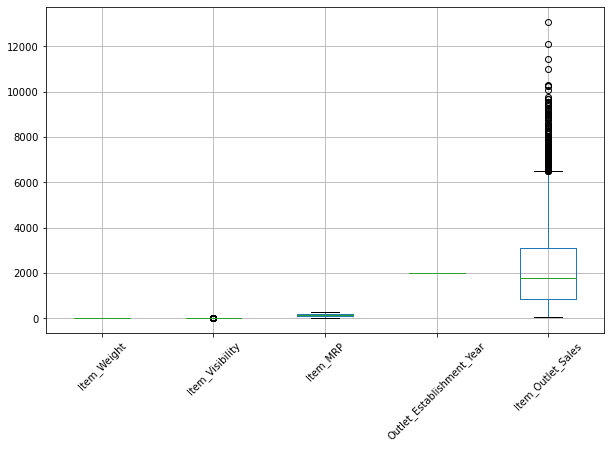

In [143]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6)) 
train_data.boxplot()
plt.xticks(rotation=45)
plt.show()

# Splitting of numerical and categorical data


In [144]:
# Split columns into numerical and categorical
numerical_cols = []
categorical_cols = []

for col in train_data.columns:
    if train_data[col].dtype in ['float64', 'int64']:
        numerical_cols.append(col)
    elif train_data[col].dtype == 'object':
        categorical_cols.append(col)

# Create separate dataframes for numerical and categorical columns
numerical_train_data = train_data[numerical_cols]
categorical_train_data = train_data[categorical_cols]

# Print the numerical dataframe
print("Numerical Train Dataframe:")
display(numerical_train_data.head())

# Print the categorical dataframe
print("Categorical Train Dataframe:")
display(categorical_train_data.head())

Numerical Train Dataframe:


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.30,0.016047,249.8092,1999,3735.1380
1,5.92,0.019278,48.2692,2009,443.4228
2,17.50,0.016760,141.6180,1999,2097.2700
3,19.20,0.000000,182.0950,1998,732.3800
4,8.93,0.000000,53.8614,1987,994.7052


Categorical Train Dataframe:


,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,Medium,Tier 3,Grocery Store
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1


In [145]:
# Getting the value counts for each categorical column
value_counts = {}

for col in categorical_train_data.columns:
    value_counts[col] = categorical_train_data[col].value_counts()

# Print the value counts
for col, counts in value_counts.items():
    print(f"{col}:\n{counts}\n")

Item_Identifier:
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64

Item_Fat_Content:
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Item_Type:
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

Outlet_Identifier:
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    5

In [146]:
# Replace values in train dataframe
train_data['Item_Fat_Content'].replace(['LF', 'low fat', 'reg'], 
                                  ['Low Fat', 'Low Fat', 'Regular'], inplace=True)

# Replace values in test dataframe
test_data['Item_Fat_Content'].replace(['LF', 'low fat', 'reg'], 
                                  ['Low Fat', 'Low Fat', 'Regular'], inplace=True)




In [147]:
# Check the result in train dataframe
print(train_data['Item_Fat_Content'].value_counts())

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64


# Univariate Analysis

In [148]:
numerical_train_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


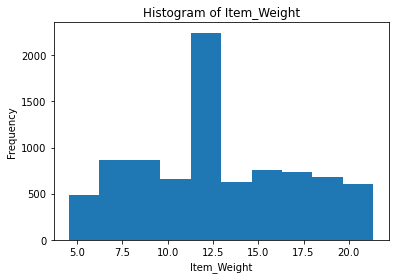

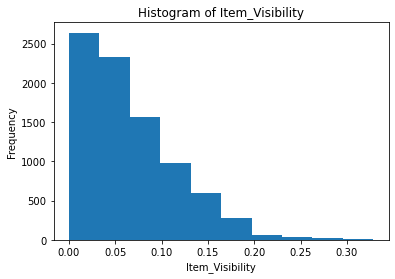

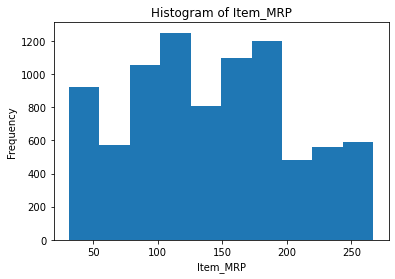

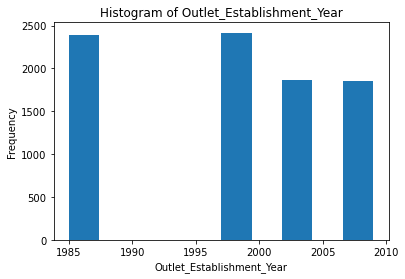

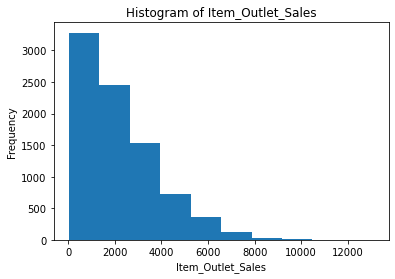

In [149]:
# Histograms for all Numeric columns 
for col in numerical_train_data.columns:
    plt.hist(numerical_train_data[col], bins=10)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {col}')
    plt.show()


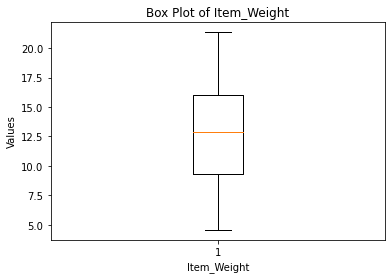

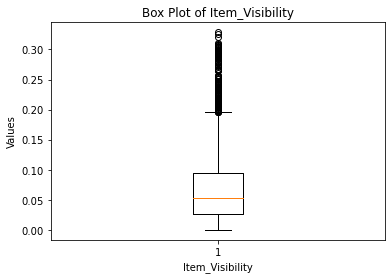

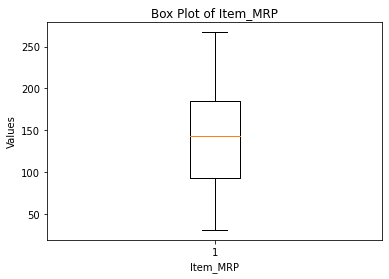

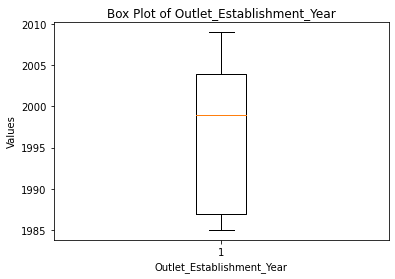

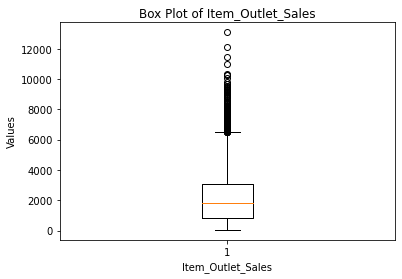

In [150]:
# Box PLots to Identify outliers
for col in numerical_train_data.columns:
    plt.boxplot(numerical_train_data[col])
    plt.xlabel(col)
    plt.ylabel('Values')
    plt.title(f'Box Plot of {col}')
    plt.show()


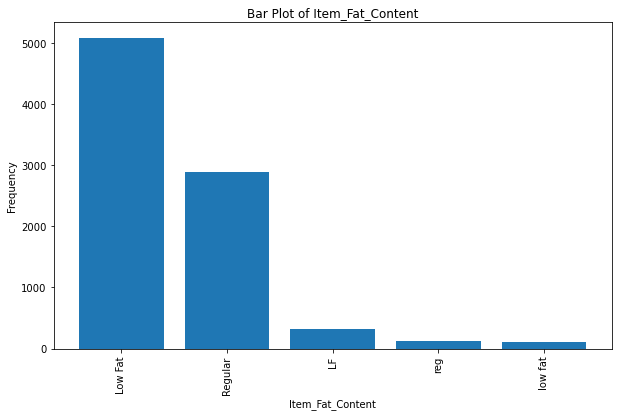

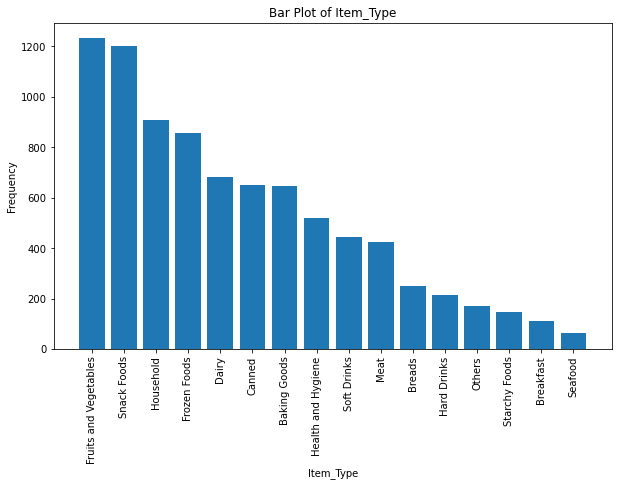

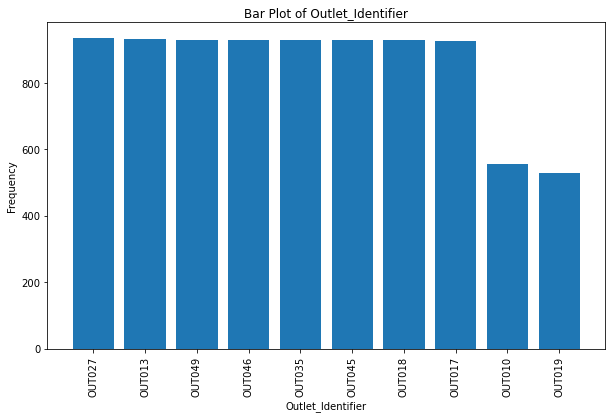

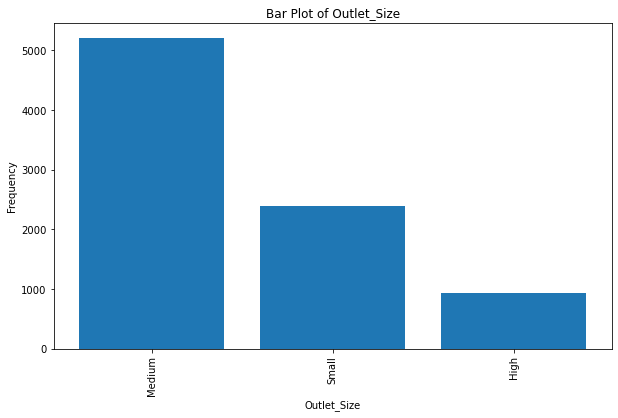

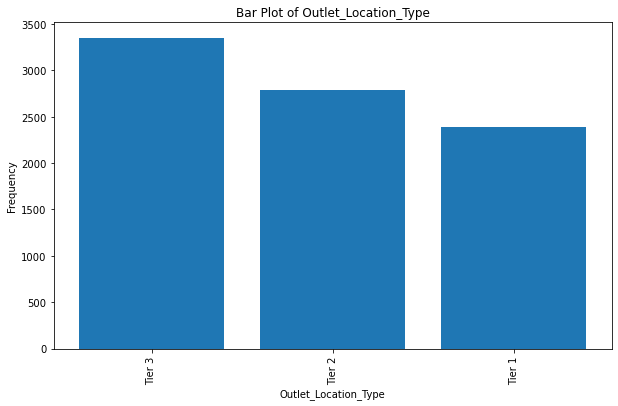

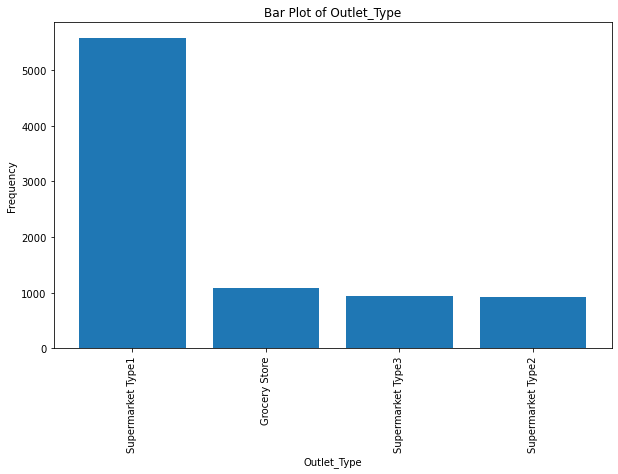

In [151]:
# Bar plots for categorical variables

for idx, col in enumerate(categorical_train_data.columns):
    if idx == 0:  # Skip the first column
        continue
    
    plt.figure(figsize=(10, 6))
    plt.bar(categorical_train_data[col].value_counts().index, categorical_train_data[col].value_counts().values)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(f'Bar Plot of {col}')
    plt.xticks(rotation=90)
    plt.show()



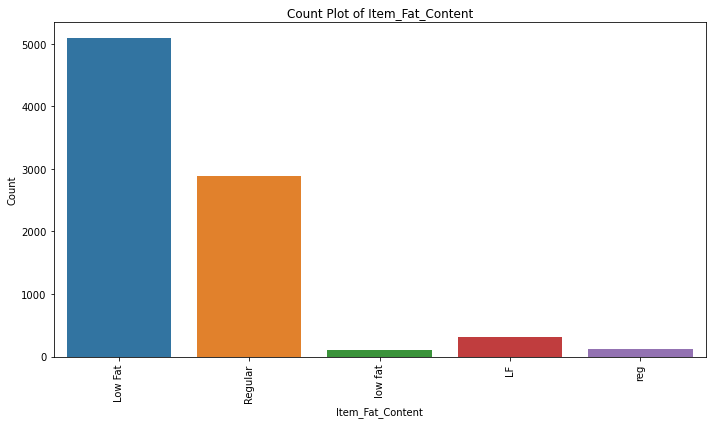

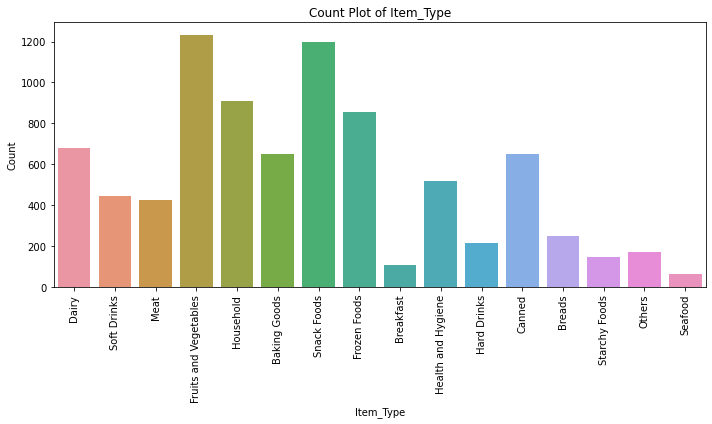

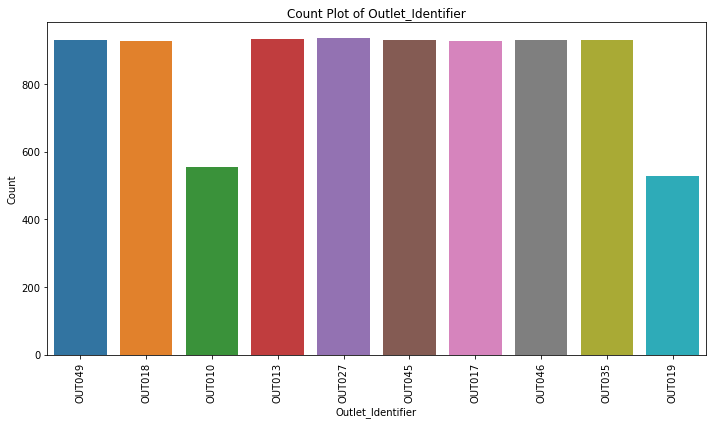

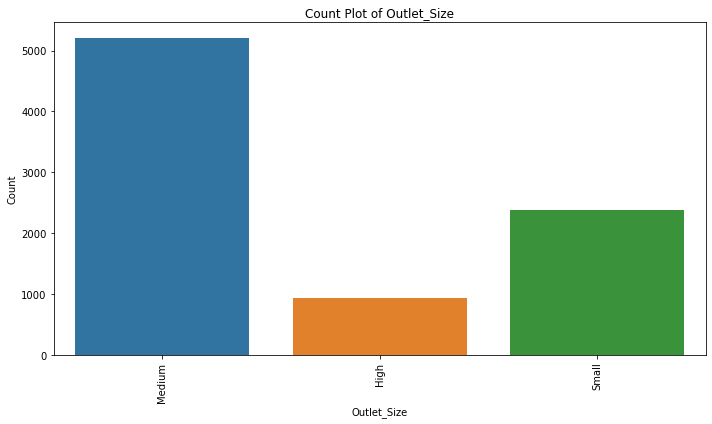

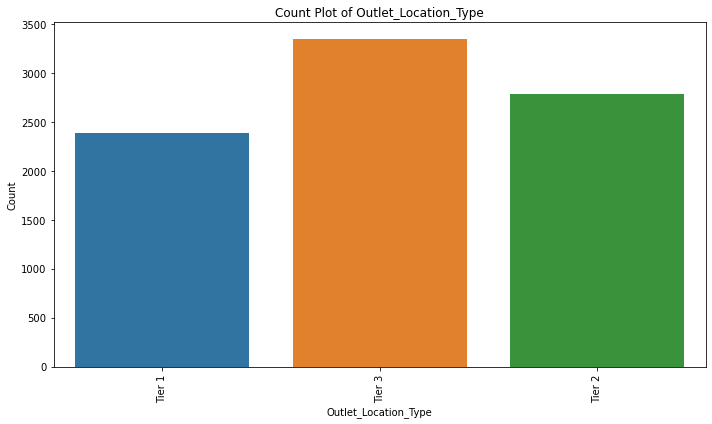

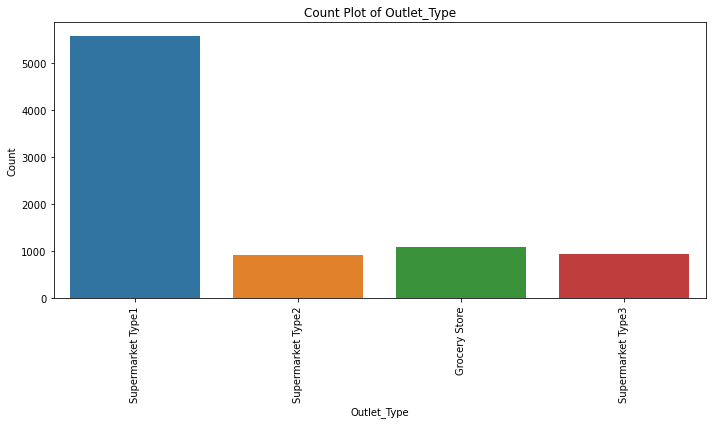

In [152]:


for idx, col in enumerate(categorical_train_data.columns):
    if idx == 0:  # Skip the plot for the first column
        continue
    
    plt.figure(figsize=(10, 6))  # Adjust the figure size as per your preference
    sns.countplot(data=categorical_train_data, x=col)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.title(f'Count Plot of {col}')
    plt.xticks(rotation=90)  # Rotate the x-axis labels by 90 degrees
    plt.tight_layout()  # Adjust the spacing to avoid overlapping labels
    plt.show()


# Bivariate Analysis

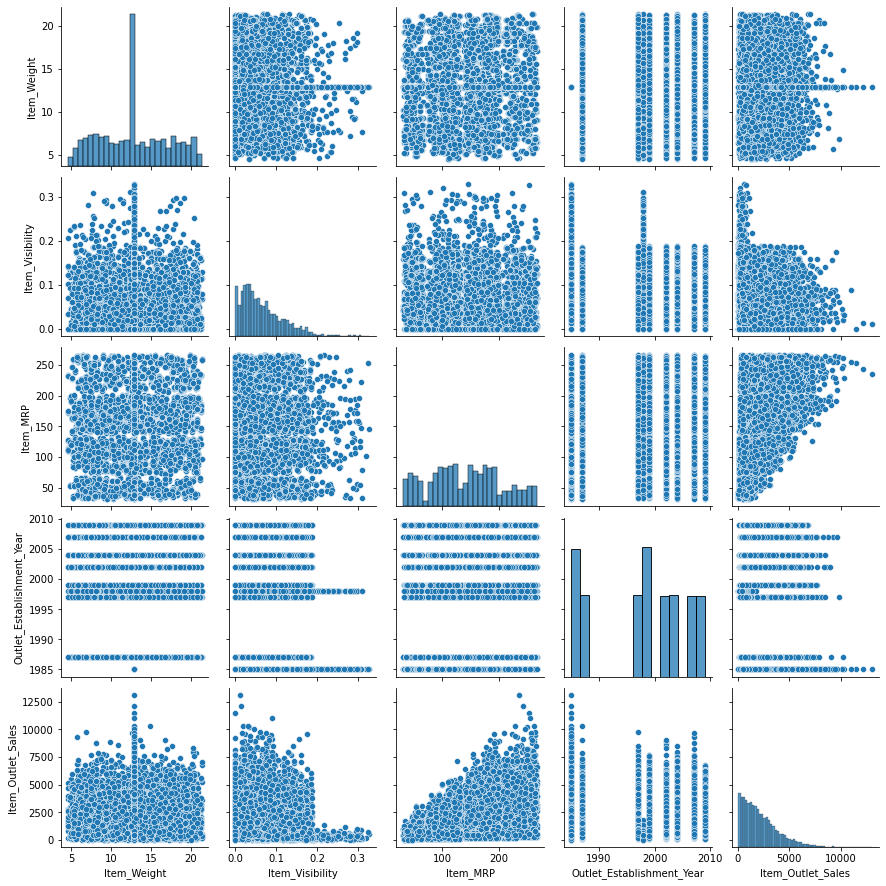

In [153]:
# Pair plot for numerical attributes
sns.pairplot(numerical_train_data)

In [154]:
# Check normality of numerical variables
for column in numerical_train_data.columns:
    data = numerical_train_data[column].dropna()
    p_value = stats.shapiro(data)[1]
    if p_value < 0.05:
        print(f"{column} is not normally distributed (p-value: {p_value})")
    else:
        print(f"{column} is normally distributed (p-value: {p_value})")




Item_Weight is not normally distributed (p-value: 8.841983115119947e-40)
Item_Visibility is not normally distributed (p-value: 0.0)
Item_MRP is not normally distributed (p-value: 5.629270967513297e-38)
Outlet_Establishment_Year is not normally distributed (p-value: 0.0)
Item_Outlet_Sales is not normally distributed (p-value: 0.0)


C:\Anaconda\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [155]:
# Normalize numerical variables using z-score normalization
normalized_train_data = (numerical_train_data - numerical_train_data.mean()) / numerical_train_data.std()


In [156]:
normalized_train_data.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,-0.841822,-0.970675,1.747351,0.139533,0.910548
1,-1.641610,-0.908058,-1.488936,1.334024,-1.018381
2,1.098490,-0.956861,0.010040,0.139533,-0.049235
3,1.500750,-1.281683,0.660011,0.020083,-0.849053
4,-0.929373,-1.281683,-1.399138,-1.293858,-0.695332


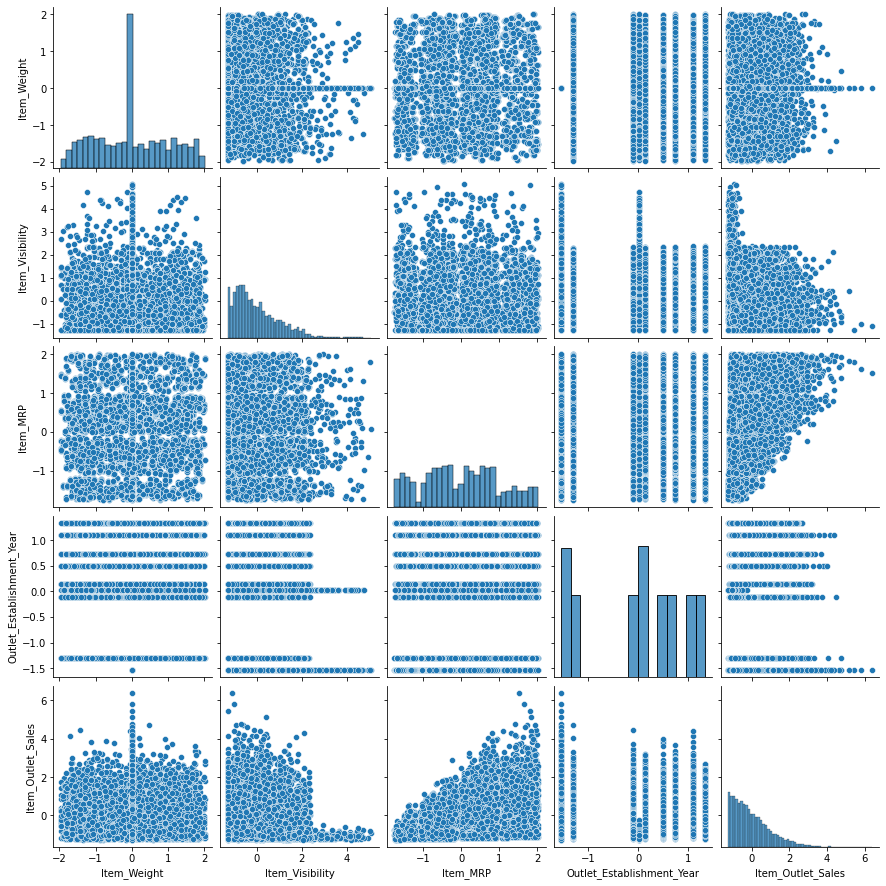

In [157]:
sns.pairplot(normalized_train_data)

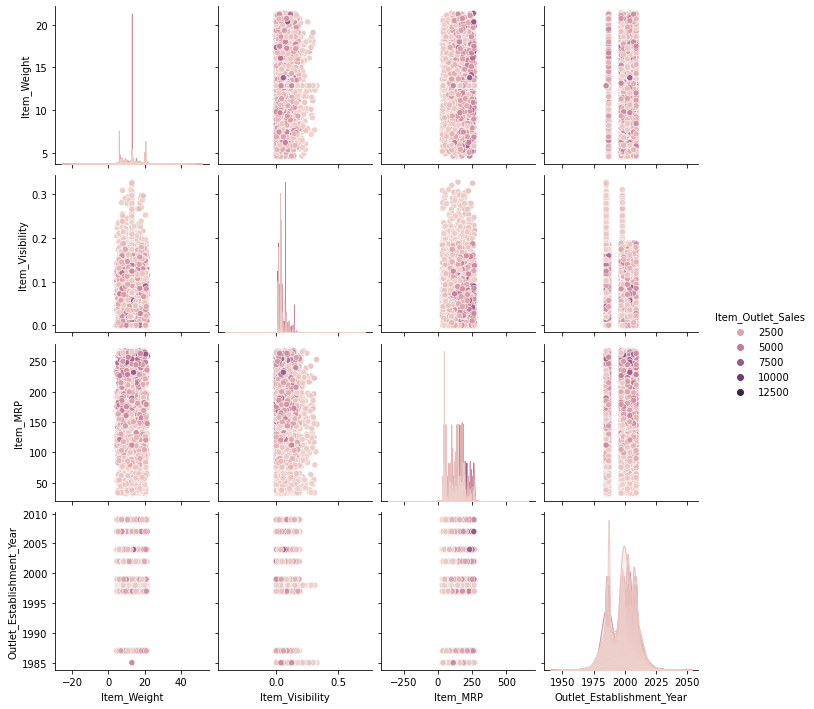

In [158]:
# pairplot with target variable as Item_Outlet_Sales
sns.pairplot(train_data,hue='Item_Outlet_Sales')

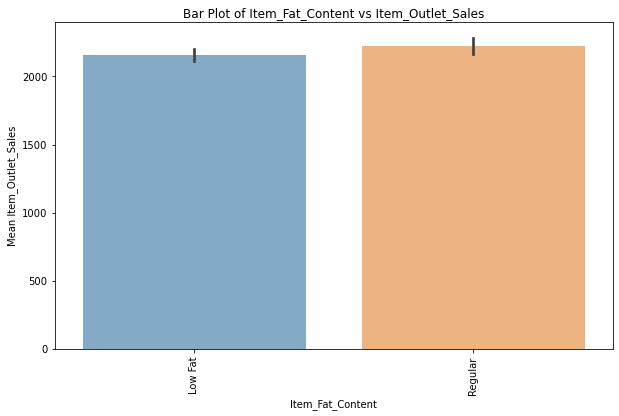

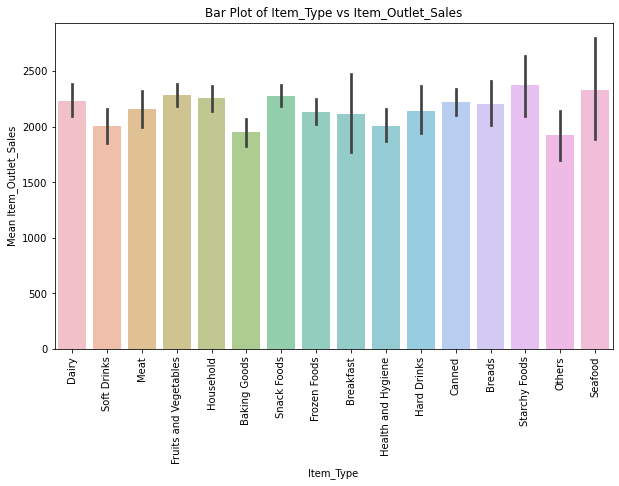

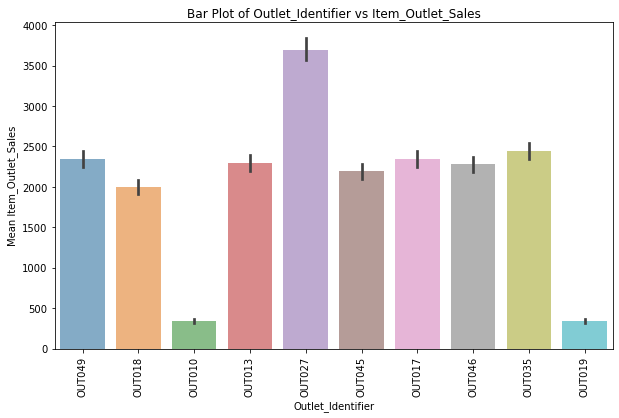

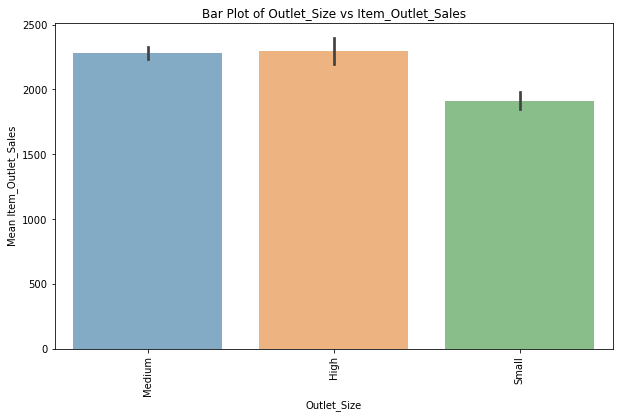

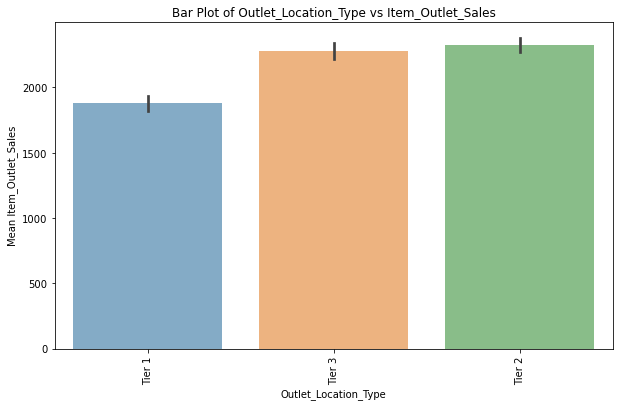

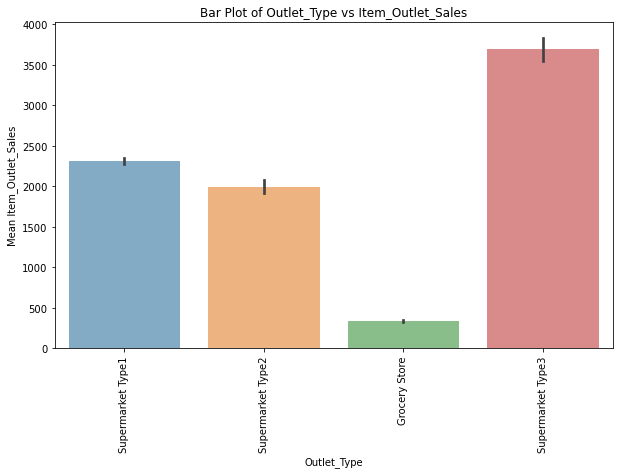

In [159]:
# Bar plots for categorical variables
categorical_cols = ['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
target_variable = 'Item_Outlet_Sales'

for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.barplot(x=col, y=target_variable, data=train_data,alpha=0.6)
    plt.xlabel(col)
    plt.ylabel('Mean ' + target_variable)
    plt.title('Bar Plot of ' + col + ' vs ' + target_variable)
    plt.xticks(rotation=90)
    plt.show()


# Multivariate analysis :- Heat Map

C:\Users\Dharani's\AppData\Local\Temp\ipykernel_31272\2238186309.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr(),annot=True,fmt='.1g')


<AxesSubplot:>

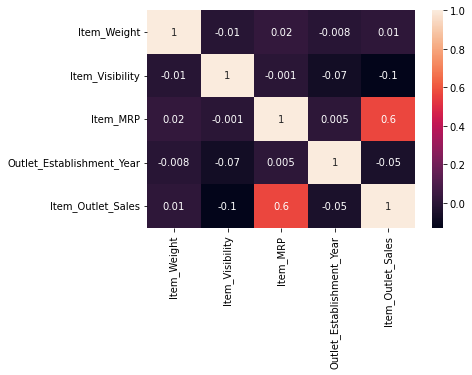

In [160]:
sns.heatmap(train_data.corr(),annot=True,fmt='.1g')
# Item_outlet_sales is strongly correleated with Item_MRP with R square of 0.6

# Encoding Technique

In [161]:
# In total of six categorical variables 
# 1) Item_fat_content --> Ordinal
# 2) Item_Type --> Nominal
# 3)Oulet_Identofier --> Nominal
# 4)Outlet_Size --> Ordinal
# 5)Outlet_Loaction_type --> Ordi
# 6) Outlet_Type --> Nominal
# I am applying Label encoding for all Ordinal attributes and One hot encoding for all nominal attributes

In [162]:
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [163]:

# Create a LabelEncoder object
le = LabelEncoder()

# List of columns to be label encoded
columns_to_encode = ['Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type']

# Apply label encoding to train data
for column in columns_to_encode:
    train_data[column] = le.fit_transform(train_data[column])

# Apply label encoding to test data
for column in columns_to_encode:
    test_data[column] = le.fit_transform(test_data[column])



In [164]:
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,0,0.016047,Dairy,249.8092,OUT049,1999,1,0,Supermarket Type1,3735.1380
1,DRC01,5.92,1,0.019278,Soft Drinks,48.2692,OUT018,2009,1,2,Supermarket Type2,443.4228
2,FDN15,17.50,0,0.016760,Meat,141.6180,OUT049,1999,1,0,Supermarket Type1,2097.2700
3,FDX07,19.20,1,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,1,2,Grocery Store,732.3800
4,NCD19,8.93,0,0.000000,Household,53.8614,OUT013,1987,0,2,Supermarket Type1,994.7052


In [165]:
test_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750000,0,0.007565,Snack Foods,107.8622,OUT049,1999,1,0,Supermarket Type1
1,FDW14,8.300000,1,0.038428,Dairy,87.3198,OUT017,2007,1,1,Supermarket Type1
2,NCN55,14.600000,0,0.099575,Others,241.7538,OUT010,1998,1,2,Grocery Store
3,FDQ58,7.315000,0,0.015388,Snack Foods,155.0340,OUT017,2007,1,1,Supermarket Type1
4,FDY38,12.695633,1,0.118599,Dairy,234.2300,OUT027,1985,1,2,Supermarket Type3


In [166]:
# One hot encoding
# Perform one-hot encoding on train data
Train_Final = pd.get_dummies(train_data, columns=['Item_Type', 'Outlet_Identifier', 'Outlet_Type'])

# Perform one-hot encoding on test data
Test_Final = pd.get_dummies(test_data, columns=['Item_Type', 'Outlet_Identifier', 'Outlet_Type'])




In [167]:
Train_Final.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Item_Type_Baking Goods,...,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,FDA15,9.30,0,0.016047,249.8092,1999,1,0,3735.1380,0,...,0,0,0,0,0,1,0,1,0,0
1,DRC01,5.92,1,0.019278,48.2692,2009,1,2,443.4228,0,...,0,0,0,0,0,0,0,0,1,0
2,FDN15,17.50,0,0.016760,141.6180,1999,1,0,2097.2700,0,...,0,0,0,0,0,1,0,1,0,0
3,FDX07,19.20,1,0.000000,182.0950,1998,1,2,732.3800,0,...,0,0,0,0,0,0,1,0,0,0
4,NCD19,8.93,0,0.000000,53.8614,1987,0,2,994.7052,0,...,0,0,0,0,0,0,0,1,0,0


In [168]:
Test_Final.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Type_Baking Goods,Item_Type_Breads,...,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,FDW58,20.750000,0,0.007565,107.8622,1999,1,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1,FDW14,8.300000,1,0.038428,87.3198,2007,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,NCN55,14.600000,0,0.099575,241.7538,1998,1,2,0,0,...,0,0,0,0,0,0,1,0,0,0
3,FDQ58,7.315000,0,0.015388,155.0340,2007,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,FDY38,12.695633,1,0.118599,234.2300,1985,1,2,0,0,...,0,1,0,0,0,0,0,0,0,1


In [169]:
Train_Final.shape

(8523, 39)

In [170]:
Test_Final.shape

(5681, 38)

In [171]:
# Remove "Item_Identifier" and "Outlet_Establishment_Year" columns from Train_Final
Train_Final = Train_Final.drop(["Item_Identifier", "Outlet_Establishment_Year"], axis=1)

# Remove "Item_Identifier" and "Outlet_Establishment_Year" columns from Test_Final
Test_Final = Test_Final.drop(["Item_Identifier", "Outlet_Establishment_Year"], axis=1)


# Maching Learning Models

In [172]:
# Separate the input features and target variable
x = Train_Final.drop('Item_Outlet_Sales', axis=1)
y = Train_Final['Item_Outlet_Sales']


In [173]:

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict using the test data
y_pred = model.predict(X_test)


In [174]:
# Calculate mean absolute error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

# Calculate mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

# Calculate root mean squared error (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error (RMSE):", rmse)

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)
print("R-squared Score:", r2)


Mean Absolute Error (MAE): 792.0247141085218
Mean Squared Error (MSE): 1143541.2997210398
Root Mean Squared Error (RMSE): 1069.3649048482187
R-squared Score: 0.5792664114419411


# Regularized Linear Regresssion

In [175]:
# Create a Lasso regression model
lasso = Lasso(alpha=0.1)  # Adjust the alpha parameter as needed

# Fit the model to the training data
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)

# Calculate mean absolute error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

# Calculate mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

# Calculate root mean squared error (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error (RMSE):", rmse)

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)
print("R-squared Score:", r2)



Mean Absolute Error (MAE): 791.8309378710958
Mean Squared Error (MSE): 1143168.1855904544
Root Mean Squared Error (RMSE): 1069.190434670295
R-squared Score: 0.579403688204172


C:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.250e+07, tolerance: 2.017e+06
  model = cd_fast.enet_coordinate_descent(


# Random Forest Regressor

In [176]:
rf = RandomForestRegressor(n_estimators=100) 
# Fit the model to the training data
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

# Calculate mean absolute error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)
print("R-squared Score:", r2)


Mean Absolute Error: 757.936809147214
Mean Squared Error: 1179081.3838321087
R-squared Score: 0.5661904454673385


# XGBOOST Regressor

In [177]:
# Create an XGBoost regressor
xgboost = xgb.XGBRegressor()  
# Fit the model to the training data
xgboost.fit(X_train, y_train)
y_pred = xgboost.predict(X_test)

# Calculate mean absolute error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)
print("R-squared Score:", r2)


Mean Absolute Error: 774.1974305904987
Mean Squared Error: 1236319.7937485443
R-squared Score: 0.545131195912142


In [178]:
Train_Final.shape

(8523, 37)

In [179]:
Test_Final.shape

(5681, 36)

In [180]:
# Linear Regression
linear_pred = model.predict(Test_Final)

# XGBoost
xgb_pred = xgboost.predict(Test_Final)

# Random Forest Regressor
rf_pred = rf.predict(Test_Final)


In [181]:
linear_pred

array([1832.611468  , 1466.20764444, 1844.04534125, ..., 1865.8029802 ,
       3579.36806264, 1298.34121691])

In [182]:
xgb_pred

array([1312.2059 , 1343.1785 ,   98.98891, ..., 1848.2119 , 4734.9507 ,
       1595.9641 ], dtype=float32)

In [183]:
rf_pred

array([1802.247362, 1296.006332,  539.511056, ..., 1607.00817 ,
       5002.202006, 1482.743258])

# Thank You